In [1]:
import numpy as np
import altair as alt 
import pandas as pd

In [2]:
def init_parameters(n_features, n_neurons, n_output): 

    np.random.seed(100)
    W1 = np.random.uniform(size = (n_features, n_neurons))
    b1 = np.random.uniform(size = (1, n_neurons))

    W2 = np.random.uniform(size = (n_neurons, n_output))
    b2 = np.random.uniform(size = (1, n_output))

    return {
        "W1" : W1 
        , "b1" : b1 
        , "W2" : W2
        , "b2" : b2 
    }

In [3]:
def linear_function(W, X, b): 
    return (X @ W)+ b 

In [4]:
def sigmoid_func(Z): 
    return 1 / (1 + np.exp(-Z))

Como primer paso vamos a cambiar la funcion de costo, como sabemos que la funcion de costo tiene la forma de: 
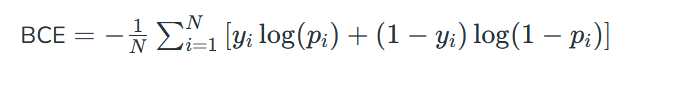
Entonces: 

In [5]:
def cost_function(A, y):
    m = y.shape[0]
    # evitar log(0)
    eps = 1e-8
    return -np.mean( y * np.log(A + eps) + (1 - y) * np.log(1 - A + eps) )


In [6]:
def predict(X, W1, W2, b1, b2): 
    Z1 = linear_function(W1, X, b1)
    S1 = sigmoid_func(Z1)
    Z2 = linear_function(W2, S1, b2)
    S2 = sigmoid_func(Z2)
    return np.where(S2 >= 0.5, 1, 0)

In [7]:
def fit(X, y, n_features=2, n_neurons=3, n_output=1,
        iterations=10, eta=0.001):

    params = init_parameters(n_features, n_neurons, n_output)
    errors = []
    m = X.shape[0]

    for _ in range(iterations):
        # Forward
        Z1 = linear_function(params['W1'], X, params['b1'])
        S1 = sigmoid_func(Z1)
        Z2 = linear_function(params['W2'], S1, params['b2'])
        S2 = sigmoid_func(Z2)

        # Pérdida BCE
        error = cost_function(S2, y)
        errors.append(error)

        # Backprop con BCE + sigmoid → ∂L/∂Z2 = S2 - y
        delta2 = (S2 - y)                            # (m×1)
        W2_gradients = (S1.T @ delta2) / m           # (n_neurons×1)
        b2_gradients = np.sum(delta2, axis=0, keepdims=True) / m

        # Actualizo parámetros salida
        params["W2"] -= eta * W2_gradients
        params["b2"] -= eta * b2_gradients

        # Backprop capa oculta (sigmoid)
        delta1 = (delta2 @ params["W2"].T) * S1 * (1 - S1)  # (m×n_neurons)
        W1_gradients = (X.T @ delta1) / m                  # (n_features×n_neurons)
        b1_gradients = np.sum(delta1, axis=0, keepdims=True) / m

        # Actualizo parámetros oculta
        params["W1"] -= eta * W1_gradients
        params["b1"] -= eta * b1_gradients

    return errors, params


In [8]:
y = np.array([[0, 1, 1, 0]]).T 
X = np.array([[0, 0, 1, 1]
              ,[0, 1, 0, 1]]).T 

In [9]:
errors, params = fit(X, y, iterations=5000, eta = 0.1)

In [10]:
y_pred = predict(X, params["W1"], params["W2"], params["b1"], params["b2"])
num_correct_predictions = (y_pred == y).sum()
accuracy = (num_correct_predictions / y.shape[0]) * 100
print('Multi-layer perceptron accuracy: %.2f%%' % accuracy)


Multi-layer perceptron accuracy: 100.00%


In [11]:
alt.data_transformers.disable_max_rows()
df = pd.DataFrame({"errors":errors, "time-step": np.arange(0, len(errors))})
alt.Chart(df).mark_line().encode(x="time-step", y="errors").properties(title='Chart 2')


alt.Chart(...)

# Mismo Dataset en Framework Pytorch

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import altair as alt

In [13]:
# Inputs: XOR problem
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T  # Shape (4, 2)
y = np.array([[0, 1, 1, 0]]).T  # Shape (4, 1)

# Convert to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define the model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = SimpleNet()

# Loss and optimizer
# Se hace la sustitucion de MSELoss por BCELoss (manteniendo sigmoid en el forward)
criterion = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
errors = []
epochs = 3000

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)      # ya sale por sigmoid
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    errors.append(loss.item())

# Convert errors to DataFrame and plot
df2 = pd.DataFrame({"errors": errors, "time-step": np.arange(epochs)})

alt.Chart(df2).mark_line().encode(
    x="time-step",
    y="errors"
).properties(title='Chart 3')


alt.Chart(...)